<img src='01_propuesta_proyecto/campos_proyecto_1.png'>

### A Tomar en cuenta:
- Numero de Muestras Tomadas   
    - Si es Mayor a 12 Muestras entonces la Probabilidad de Hospitalizacion es (6/7)
- Tipo de Cultivo
    - Si es `Urocultivo`, `Hemocultivo` ó `Hemocultivo y Urocultivo` la Probabilidad de Hospitalizacion es (100%)
- Hospitalizacion Ultimo Mes
    - Si es ("SI")  entonces la Probabilidad es (1/5)
- Fiebre
    - Si es ("SI") entonces la Probabilidad es (21/37)
- Patron de Resistencia (Puede diagnosticarse antes mediante examen de Orina o despues en Examen de Tejido extraido en Biopsia)
    - Si presenta cualquiera de los siguientes patrones de resistencia, la Probabilidad es (100%) 
        - RESISTENTE A AMPI, CIPRO Y GENTA
        - RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA
        - MULTI SENSIBLE
        - AMPI R, CIPRO R, GENTA R, SULFA M R
- Agente Aislado (Puede diagnosticarse antes median examen de Orina o despues en Examen de Tejido extraido en Biopsia)
    - Si presenta cualquiera de los siguientes Agentes Aislados, la Probabilidad es (100%)
        - E.COLI
        - PSEUDOMONAS AERUGINOSA
- ITU Infeccion en el Tracto Urinario
    - Si hay Infeccion la Probabilidad es 100%

### De Plano se puede descartar 
- Enfermedad Crónica Pulmonar Obstructiva
- CUP

In [1]:

import polars as pl

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [3]:
df = pl.read_csv('02_data_original/BBDD_Hospitalización.csv', separator=';')

In [4]:
mask = df['HOSPITALIZACION'] == 'SI'

***
#### **TIPO DE CULTIVO**

In [5]:
# Hospitalizacion = 'SI'
df.filter(mask)['TIPO DE CULTIVO'].value_counts()

TIPO DE CULTIVO,count
str,u32
"""UROCULTIVO""",4
"""NO""",16
"""HEMOCULTIVO Y UROCULTIVO""",2
"""HEMOCULTIVO""",2


In [6]:
# DATA COMPLETA
df['TIPO DE CULTIVO'].value_counts()

TIPO DE CULTIVO,count
str,u32
"""UROCULTIVO""",4
"""NO""",560
"""HEMOCULTIVO""",2
"""HEMOCULTIVO Y UROCULTIVO""",2
null,2


***
#### **Patron de Resistencia**

In [7]:
# Hospitalizacion = 'SI'
df.filter(mask)['PATRON DE RESISTENCIA'].value_counts()

PATRON DE RESISTENCIA,count
str,u32
"""RESISTENTE A AMPI, SULFA, CEFA…",2
"""NO""",17
""" AMPI R, CIPRO R, GENTA R, SUL…",1
"""MULTI SENSIBLE""",2
"""RESISTENTE A AMPI, CIPRO Y GEN…",2


In [8]:
# DATA COMPLETA
df['PATRON DE RESISTENCIA'].value_counts()

PATRON DE RESISTENCIA,count
str,u32
null,2
""" AMPI R, CIPRO R, GENTA R, SUL…",1
"""NO""",561
"""RESISTENTE A AMPI, SULFA, CEFA…",2
"""MULTI SENSIBLE""",2
"""RESISTENTE A AMPI, CIPRO Y GEN…",2


***
#### **Agente Aislado**

In [9]:
# Hospitalizacion = 'SI'
df.filter(mask)['AGENTE AISLADO'].value_counts()

AGENTE AISLADO,count
str,u32
"""NO""",16
"""E.COLI""",6
"""PSEUDOMONAS AERUGINOSA""",2


In [10]:
# DATA COMPLETA
df['AGENTE AISLADO'].value_counts()

AGENTE AISLADO,count
str,u32
"""E.COLI""",6
"""PSEUDOMONAS AERUGINOSA""",2
null,19
"""NO""",543


***
#### **En que dia POST-BIOPSIA se presenta la Infeccion**


In [11]:
# Hospitalizacion = 'SI'
df.filter(mask)['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,count
str,u32
"""1""",5
"""5""",2
"""3""",8
"""2""",9


In [12]:
# DATA COMPLETA
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,count
str,u32
"""3""",8
"""2""",9
"""5""",2
"""9""",2
"""1""",5
null,2
"""NO""",542


***
#### **Volumen Prostático**

In [13]:
# Hospitalizacion = 'SI'
df.filter(mask)['VOLUMEN PROSTATICO'].value_counts()

VOLUMEN PROSTATICO,count
str,u32
"""SI""",18
"""NO""",6


In [14]:
# DATA COMPLETA
df['VOLUMEN PROSTATICO'].value_counts()

VOLUMEN PROSTATICO,count
str,u32
"""NO""",159
null,3
"""SI""",408


***
#### **Dias Hospitalizacion MQ**

In [15]:
# ESTA ESTA DIRECTA SI HUBO HOSPITALIZACION MQ HUBO HOSPITALIZACION
# Hospitalizacion = 'SI'
df.filter(mask)['DIAS HOSPITALIZACION MQ'].value_counts()

DIAS HOSPITALIZACION MQ,count
i64,u32
2,8
3,5
4,6
12,2
5,3


In [16]:
# DATA COMPLETA
df['DIAS HOSPITALIZACION MQ'].value_counts()

DIAS HOSPITALIZACION MQ,count
i64,u32
12,2
4,6
null,2
2,8
0,544
3,5
5,3


***
#### **Dias Hospitalizacion UPC**

In [17]:
# Hospitalizacion = 'Si'
df.filter(mask)['DIAS HOSPITALIZACIÓN UPC'].value_counts()

DIAS HOSPITALIZACIÓN UPC,count
i64,u32
0,21
2,1
3,2


In [18]:
# DATA COMPLETA
df['DIAS HOSPITALIZACIÓN UPC'].value_counts()

DIAS HOSPITALIZACIÓN UPC,count
i64,u32
null,2
2,1
3,2
0,565


***
#### **NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA**

In [19]:
# Hospitalizacion = 'Si'
df.filter(mask)['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,count
str,u32
"""1""",5
"""2""",9
"""3""",8
"""5""",2


In [20]:
# DATA COMPLETA
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,count
str,u32
"""3""",8
"""9""",2
"""NO""",542
null,2
"""5""",2
"""2""",9
"""1""",5


***
#### **Fiebre**

In [21]:
# Hospitalizacion = 'SI'
df.filter(mask)['FIEBRE'].value_counts()

FIEBRE,count
str,u32
"""SI""",21
"""NO""",3


In [22]:
# DATA COMPLETA
df['FIEBRE'].value_counts()

FIEBRE,count
str,u32
"""NO""",531
"""SI""",37
null,2


***
#### **ITU**

In [23]:
# Hospitalizacion = 'SI'  
df.filter(mask)['ITU'].value_counts()

ITU,count
str,u32
"""NO""",18
"""SI""",6


In [24]:
# DATA COMPLETA
df['ITU'].value_counts()

ITU,count
str,u32
"""NO""",562
null,2
"""SI""",6


***
***
El Estudio pide `predecir el dia que se realiza la Biopsia` la Probabilidad de que el Paciente sea Hospitalizado en los siguientes 30 dias.  Variables como 'DIAS HOSPITALIZACIÓN UPC', o 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' son variables que claramente ocurren despues del dia de la Biopsia. <br>
Por otra parte Variables como 'PATRON DE RESISTENCIA' o 'TIPO DE CULTIVO' asumiré que tambien son Variables Posteriores al dia de la Biopsia, y que dichos estudios se realizan a las muestras obtenidas durante la Profilaxis.  Pero cabe aclarar que sería interesante conocer a fondo sobre la parte médica ya que son estudios que pudieran realizarce antes de la Profilaxis mediante un examen de Orina.  Estas Variables aunque no estan en el modelo deben ser informadas al Cliente, ya que `son muy importantes para determinar posibilidad de Hospitalizacion sin necesidad de Modelo`, y pudieran adelantarse, como se dijo anteriormente con examen de orina.  <br>
Bien pero como no son las unicas variables en juego seguiremos con las demas variables armando el modelo  

In [25]:
columnas_a_borrar = ['PATRON DE RESISTENCIA', 'TIPO DE CULTIVO', 'DIAS HOSPITALIZACION MQ', 
            'DIAS HOSPITALIZACIÓN UPC', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
            'ITU', 'AGENTE AISLADO', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA' ]

categorical_bi = ['BIOPSIAS PREVIAS', 'CUP', 'DIABETES', 'FIEBRE', 'HOSPITALIZACION',  'HOSPITALIZACIÓN ULTIMO MES',
                  'ITU', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'VOLUMEN PROSTATICO']

Todas las Columnas cuyos valores son 'Si' ó 'No' las voy a pasar a 1 ó 0

In [26]:
for column in categorical_bi:
    df = df.with_columns(
        pl.when(pl.col(column) == 'NO')
          .then(pl.lit(0)).otherwise(pl.lit(1))
          .alias(column)  
    ) 

Necesitamos pasar algunas Variables de String a Numericas, en PSA tenemos que reemplazar la `,` por el `.` primero

In [27]:
df = df.with_columns(
    pl.col('NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA').cast(pl.Float32)
      .alias('NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA') 
)

df = df.with_columns(pl.col('PSA').str.replace(',','.').alias('PSA'))
df = df.with_columns(pl.col('PSA').cast(pl.Float32).alias('PSA'))


Tenemos una Data con un desbalanceo MUY NOTORIO.  Al tener dos registros con edades atipicas y que no pertenecen a la clase Minoritaria (Hospitalizacion = 1), los eliminaré

In [28]:
mask = (df['EDAD'] == 143) | (df['EDAD'] == 151)
df.filter(mask)

EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
i64,i32,i32,f32,i32,i32,str,i64,i32,str,str,f32,i32,i32,str,str,str,i32,i64,i64
143,1,0,6.8,0,0,"""FLUOROQUINOLONA_AMINOGLICOSIDO""",12,0,"""NO""","""NEG""",0.0,0,0,"""NO""","""NO""","""NO""",0,0,0
151,0,0,5.7,0,1,"""OTROS""",12,0,"""NO""","""NEG""",0.0,0,0,"""NO""","""NO""","""NO""",0,0,0


In [29]:
mask = df['EDAD'] <= 84
df = df.filter(mask)

Procedo a Borrar las columnas que no van para el modelamiento

In [30]:
df = df.drop(columnas_a_borrar)

In [31]:
df.head(1)

EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,BIOPSIA,FIEBRE,HOSPITALIZACION
i64,i32,i32,f32,i32,i32,str,i64,str,i32,i32
53,0,0,4.0,0,1,"""FLUOROQUINOLONA_AMINOGLICOSIDO""",12,"""NEG""",1,1


Verifico sí hay campos nulos en las Variables que se quedaron para el modelamiento

In [32]:
for column in df.columns:
    print(f'Cantidad de Nulos: {df[column].is_null().sum()} --> Campo: {column}')

Cantidad de Nulos: 0 --> Campo: EDAD
Cantidad de Nulos: 0 --> Campo: DIABETES
Cantidad de Nulos: 0 --> Campo: HOSPITALIZACIÓN ULTIMO MES
Cantidad de Nulos: 4 --> Campo: PSA
Cantidad de Nulos: 0 --> Campo: BIOPSIAS PREVIAS
Cantidad de Nulos: 0 --> Campo: VOLUMEN PROSTATICO
Cantidad de Nulos: 0 --> Campo: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
Cantidad de Nulos: 0 --> Campo: NUMERO DE MUESTRAS TOMADAS
Cantidad de Nulos: 0 --> Campo: BIOPSIA
Cantidad de Nulos: 0 --> Campo: FIEBRE
Cantidad de Nulos: 0 --> Campo: HOSPITALIZACION


In [33]:
mask = df['PSA'].is_null()
df.filter(mask)

EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,BIOPSIA,FIEBRE,HOSPITALIZACION
i64,i32,i32,f32,i32,i32,str,i64,str,i32,i32
44,0,0,null,0,0,"""FLUOROQUINOLONA_AMINOGLICOSIDO""",12,"""NEG""",1,1
57,0,0,null,0,0,"""FLUOROQUINOLONA_AMINOGLICOSIDO""",18,"""HIPERPLASIA PROSTATICA""",0,0
60,0,0,null,1,1,"""FLUOROQUINOLONA_AMINOGLICOSIDO""",16,"""NEG""",0,0
62,0,0,null,0,1,"""FLUOROQUINOLONA_AMINOGLICOSIDO""",6,"""ADENOCARCINOMA GLEASON 8 """,0,0


De los registros con datos Nulos solo hay 1 cuya valor de `Hospitalizacion` es igual a 1 que es el unico dato que me interesa salvar ya que pertenece a la clase minoritaria de este dataset tan desbalanceado

In [34]:

mask = df['HOSPITALIZACION'] == 1
print(f'Minimo --> {df.filter(mask)["PSA"].min()}')
print(f'Máximo --> {df.filter(mask)["PSA"].max()}')
print(f'Promedio --> {df.filter(mask)["PSA"].mean()}')
print(f'Mediana --> {df.filter(mask)["PSA"].median()}')
print(f'Moda --> {df.filter(mask)["PSA"].mode()[0]}')

fig = px.histogram(df.filter(mask), x="PSA", nbins=10, title="Distribución de valores")
fig.show()

Minimo --> 4.0
Máximo --> 29.0
Promedio --> 8.445769218298105
Mediana --> 6.199999809265137
Moda --> 7.0


Cuando el PSA sobrepasa el valor de 4 ya se considera alto.. Al Tener las 3 medidas de Tendencia central tan cercanas y dentro del rango 5 - 10 donde se encuentra la Mayoria de los valores, tomaré un promedio de esas 3 medidas.  Las otras 2 opciones serian realizar un modelo de regresion lineal solo para calcular el PSA faltante dentro de los 27 datos cuya Hospitalizacion es si, o eliminar ese dato debido a que es uno solo

In [ ]:
# Debido a que probe mas adelante el modelo tanto con los 27 Datos de Hospitalizacion == 1 como
# con 26 Registros eliminando el registro con informacion Nula en el campo PSA y me dio una mejor
# Generalizacion eliminando dicho registro este paso lo voy a obviar.  
# Lo que recomendaria es aplicar ambos casos y ver como se comporta el modelo mejor

promedio = round(((df.filter(mask)["PSA"].mean() + df.filter(mask)["PSA"].median() + df.filter(mask)["PSA"].mode()[0])/3),1)

df = df.with_columns(
    pl.when(pl.col('PSA').is_null()).then(pl.lit(promedio)).otherwise(pl.col('PSA')).alias('PSA')
)

# Una vez que reemplazo el valor de PSA en el registro cuyo valor de HOSPITALIZACION == 1,  
# entonces si puedo borrar los otros 3 registros


In [35]:
df = df.drop_nulls()

In [36]:
categorical_columns = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'BIOPSIA',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'FIEBRE',
       'HOSPITALIZACION']

numerical_columns = ['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS']

Grafico de Columnas de las Variables Categoricas

In [37]:
fig = make_subplots(rows=5, cols=2, subplot_titles=categorical_columns)

for i,column in enumerate(categorical_columns):
    data = df[column]
    x = data.unique()
    y = data.value_counts()[:,1]
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Bar(x=x, y=y, name=column), row=row, col=col)

fig.update_layout(height=1800, width=1200, title_text="Categorical Data Distributions")



***
Categorias Numericas

In [38]:
df_numerical_columns = df[numerical_columns]

In [39]:
fig = make_subplots(rows=3, cols=1, subplot_titles=numerical_columns)
for i, column in enumerate(numerical_columns):
    row = i + 1
    col = 1
    fig.add_trace(go.Box(y=df_numerical_columns[:,i], name=column), row=row, col=col)

fig.update_layout(height=1500, width=1200, title_text="Numerical Data Distributions")

In [40]:
df_correlacion = df.drop('ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS').drop('BIOPSIA')
correlacion = df_correlacion.corr()

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style()
plt.style.use("seaborn-v0_8-dark")

In [42]:
correlacion

EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,FIEBRE,HOSPITALIZACION
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.136322,-0.027136,0.184563,-0.08855,0.253808,-0.208255,0.004462,-0.04189
0.136322,1.0,0.027121,-0.022917,-0.061864,0.091446,-0.049273,-0.022536,0.057638
-0.027136,0.027121,1.0,-0.037931,-0.031831,-0.025901,0.033845,0.052603,0.069343
0.184563,-0.022917,-0.037931,1.0,-0.044125,0.128842,-0.20511,-0.036981,-0.068145
-0.08855,-0.061864,-0.031831,-0.044125,1.0,-0.054991,0.392527,0.032467,-0.017874
0.253808,0.091446,-0.025901,0.128842,-0.054991,1.0,-0.107471,0.048569,-0.01481
-0.208255,-0.049273,0.033845,-0.20511,0.392527,-0.107471,1.0,0.066753,0.073489
0.004462,-0.022536,0.052603,-0.036981,0.032467,0.048569,0.066753,1.0,0.634297
-0.04189,0.057638,0.069343,-0.068145,-0.017874,-0.01481,0.073489,0.634297,1.0


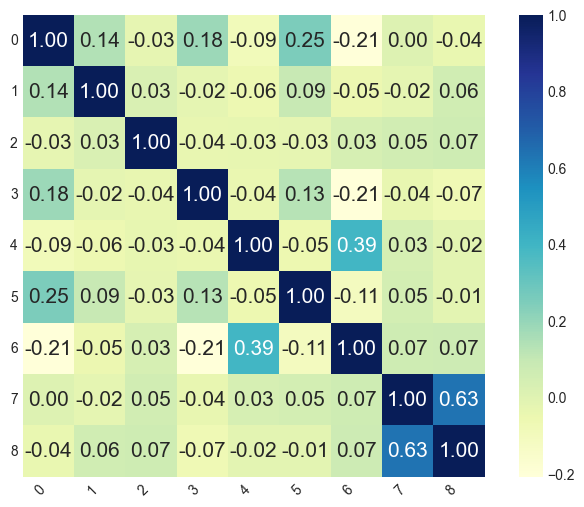

In [43]:
fig = plt.figure(figsize= (9,6))
sns.heatmap(correlacion, annot=True, cmap="YlGnBu", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.columns

Guardando la Data que será utilizada para Modelar

In [44]:
df.write_csv('03_data_procesada/01_data_pro_1.csv')